In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle
pd.set_option('display.max_columns', None)
import plotly.express as px
import math
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
# import plotly.offline as pyo
# pyo.init_notebook_mode(connected=True)

In [3]:
with open('/Users/omrilapidot/Vbet_adjusted_data/dataframes.pkl', 'rb') as f:
    dataframes = pickle.load(f)

In [4]:
dataframes.keys()

dict_keys(['ClientSportsbookProfile', 'viewmat_ClientDetails', 'ClientLimit', 'ClientRestriction', 'ClientSession', 'ClientKPI', 'cube_finance', 'cube_CasinoSpins', 'cube_sportsbook_bet_selection', 'cube_sportsbook_bet'])

In [5]:
df = dataframes["cube_finance"][['TimestampHour', 'ClientId','DepositAmountInEUR',"WithdrawalAmountInEUR"]]

In [4]:
df = dataframes["cube_finance"]

In [7]:
df

,TimestampHour,PartnerId,ClientId,CurrencyId,PaidBonusCount,PaidBonusAmount,PaidBonusAmountInEUR,CashBackBonusCount,CashBackBonusAmount,CashBackBonusAmountInEUR,CorrectionUpCount,CorrectionUpAmount,CorrectionUpAmountInEUR,CorrectionDownCount,CorrectionDownAmount,CorrectionDownAmountInEUR,BuddyToBuddyTransferCount,BuddyToBuddyTransferAmount,BuddyToBuddyTransferInEUR,PointEarned,ExchangeMoney,ExchangeMoneyInEUR,PaymentSystemId,DepositCount,DepositAmount,DepositAmountInEUR,DepositRollbackCount,DepositRollbackAmount,DepositRollbackAmountInEUR,WithdrawalCount,WithdrawalAmount,WithdrawalAmountInEUR,WithdrawalRollbackCount,WithdrawalRollbackAmount,WithdrawalRollbackAmountInEUR
0,2022-09-08 08:00:00+00:00,692,325024392,BRL,0.0,0.00,0.00000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-09-08 08:00:00+00:00,692,403277511,BRL,0.0,0.00,0.00000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-09-08 08:00:00+00:00,692,412425811,BRL,0.0,0.00,0.00000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-09-08 08:00:00+00:00,692,685737277,BRL,0.0,0.00,0.00000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-09-08 17:00:00+00:00,692,781492278,BRL,1.0,161.25,30.89422,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,2022-08-24 14:00:00+00:00,692,232563960,BRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1399.0,1.0,350.0,66.172939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
819,2022-08-24 22:00:00+00:00,692,652591765,BRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1399.0,1.0,350.0,66.172939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
820,2022-08-24 17:00:00+00:00,692,577021996,BRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.0,1.0,350.0,66.172939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
821,2022-08-24 23:00:00+00:00,692,555194674,BRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1399.0,1.0,350.0,66.172939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# df = df[~df["DepositAmountInEUR"].isna()]

In [2]:
df.dtypes

NameError: name 'df' is not defined

In [10]:
# def time_grouping(df, time_scale):
#     """Assign a time grouping based on the given time scale."""
#     if time_scale == "YearMonth":
#         return df['TimestampHour'].dt.strftime('%Y-%m')
#     elif time_scale == "YearQuarter":
#         return df['TimestampHour'].dt.year.astype(str) + '-Q' + df['TimestampHour'].dt.quarter.astype(str)
#     elif time_scale == "HalfYear":
#         return df['TimestampHour'].dt.year.astype(str) + '-H' + (2 * (df['TimestampHour'].dt.month > 6) + 1).astype(str)
#     elif time_scale == "FullYear":
#         return df['TimestampHour'].dt.year.astype(str)
#     else:
#         raise ValueError("Invalid time_scale value!")

# def plot_histogram(df, time_scale, deposits_only=True):
#     df['TimeGroup'] = time_grouping(df, time_scale)
    
#     # Compute the net amount based on the flag
#     if deposits_only:
#         df['Amount'] = df['DepositAmountInEUR']
#     else:
#         df['Amount'] = df['DepositAmountInEUR'] - df['WithdrawalAmountInEUR']
    
#     grouped = df.groupby(['TimeGroup', 'ClientId'])['Amount'].sum().reset_index()

#     # Create a DataFrame for the count of ClientId for each time grouping
#     count_data = grouped.groupby('TimeGroup')['ClientId'].count().reset_index()
#     count_data.columns = ['TimeGroup', 'Count']

#     # Determine the number of unique time groupings
#     num_groups = len(grouped['TimeGroup'].unique())

#     # Create subplots
#     fig, axes = plt.subplots(num_groups, 1, figsize=(10, 5 * num_groups))
#     if num_groups == 1:
#         axes = [axes]

#     # Plot for each time group on its respective subplot
#     for i, group in enumerate(grouped['TimeGroup'].unique()):
#         ax = axes[i]
        
#         # Extract the sample count for the current group
#         sample_count = count_data[count_data['TimeGroup'] == group]['Count'].values[0]
        
#         sns.histplot(data=grouped[grouped['TimeGroup'] == group], x='Amount', ax=ax, bins=[2**i for i in range(20)], stat="percent")
#         ax.set_title(f'Net Amount in {group} (Samples: {sample_count})' if not deposits_only else f'Deposit Amount in {group} (Samples: {sample_count})')
#         ax.set_xscale('log')
#         ax.set_ylabel('Percentage (%)')
        
#         # Annotate each bar with its percentage value
#         for patch in ax.patches:
#             height = patch.get_height()
#             ax.annotate(f'{height:.2f}%', (patch.get_x() + patch.get_width() / 2., patch.get_height()),
#                         ha='center', va='center', xytext=(0, 5), textcoords='offset points')
#     plt.tight_layout()
#     plt.show()

# # Assuming df and its 'TimestampHour', 'DepositAmountInEUR', and 'WithdrawalAmountInEUR' columns are already defined
# # Function calls for each case:


In [30]:
def time_grouping(df, time_scale):
    """Assign a time grouping based on the given time scale."""
    if time_scale == "AllTime":
        return pd.Series(["All Time"] * len(df))
    elif time_scale == "YearMonth":
        return df['TimestampHour'].dt.strftime('%Y-%m')
    elif time_scale == "YearQuarter":
        return df['TimestampHour'].dt.year.astype(str) + '-Q' + df['TimestampHour'].dt.quarter.astype(str)
    elif time_scale == "HalfYear":
        return df['TimestampHour'].dt.year.astype(str) + '-H' + (2 * (df['TimestampHour'].dt.month > 6) + 1).astype(str)
    elif time_scale == "FullYear":
        return df['TimestampHour'].dt.year.astype(str)
    else:
        raise ValueError("Invalid time_scale value!")


def plot_histogram(df, time_scale, deposits_only=True, save_individual_plots=False, save_path="/path"):
    df['TimeGroup'] = time_grouping(df, time_scale)
    
    # Compute the net amount based on the flag
    if deposits_only:
        df['Amount'] = df['DepositAmountInEUR']
    else:
        df['Amount'] = df['DepositAmountInEUR'] - df['WithdrawalAmountInEUR']
    
    grouped = df.groupby(['TimeGroup', 'ClientId'])['Amount'].sum().reset_index()

    # Create a DataFrame for the count of ClientId for each time grouping
    count_data = grouped.groupby('TimeGroup')['ClientId'].count().reset_index()
    count_data.columns = ['TimeGroup', 'Count']

    # Determine the number of unique time groupings
    num_groups = len(grouped['TimeGroup'].unique())

    # Check if the individual plots should be saved
    if save_individual_plots:
        
        # Create a subfolder for each combination of time_scale and deposits_only
        deposit_string = "DepositsOnly" if deposits_only else "NetAmount"
        subfolder_path = os.path.join(save_path, f"{time_scale}_{deposit_string}")
        
        # If subfolder path doesn't exist, create it
        if not os.path.exists(subfolder_path):
            os.makedirs(subfolder_path)
        
        for group in grouped['TimeGroup'].unique():
            fig, ax = plt.subplots(figsize=(10, 5))
            
            sample_count = count_data[count_data['TimeGroup'] == group]['Count'].values[0]
            
            sns.histplot(data=grouped[grouped['TimeGroup'] == group], x='Amount', ax=ax, bins=[2**i for i in range(20)], stat="percent")
            ax.set_title(f'Net Amount in {group} (Samples: {sample_count})' if not deposits_only else f'Deposit Amount in {group} (Samples: {sample_count})')
            ax.set_xscale('log')
            ax.set_ylabel('Percentage (%)')
            for patch in ax.patches:
                height = patch.get_height()
                ax.annotate(f'{height:.2f}%', (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                            ha='center', va='center', xytext=(0, 5), textcoords='offset points')
            plt.tight_layout()
            
            # Including the combination in the filename as well
            plt.savefig(os.path.join(subfolder_path, f"plot_{group}_{time_scale}_{deposit_string}.png"))
            
            plt.close()  # Close the current figure to free memor
    else:
        # Create subplots
        fig, axes = plt.subplots(num_groups, 1, figsize=(10, 5 * num_groups))
        if num_groups == 1:
            axes = [axes]

        for i, group in enumerate(grouped['TimeGroup'].unique()):
            ax = axes[i]
            sample_count = count_data[count_data['TimeGroup'] == group]['Count'].values[0]
            
            sns.histplot(data=grouped[grouped['TimeGroup'] == group], x='Amount', ax=ax, bins=[2**i for i in range(20)], stat="percent")
            ax.set_title(f'Net Amount in {group} (Samples: {sample_count})' if not deposits_only else f'Deposit Amount in {group} (Samples: {sample_count})')
            ax.set_xscale('log')
            ax.set_ylabel('Percentage (%)')
            for patch in ax.patches:
                height = patch.get_height()
                ax.annotate(f'{height:.2f}%', (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                            ha='center', va='center', xytext=(0, 5), textcoords='offset points')
        plt.tight_layout()
        plt.show()

# Assuming df and its 'TimestampHour', 'DepositAmountInEUR', and 'WithdrawalAmountInEUR' columns are already defined
# Example function call for saving individual plots:
# plot_histogram(df, "YearMonth", True, save_individual_plots=True, save_path="/path/to/save")


In [23]:
plot_histogram(df, "YearMonth", deposits_only=True,save_individual_plots=True, save_path="/Users/omrilapidot/Documents/Vebets_fig")

/var/folders/xy/dqjmbwj5485cqh5qfjc3js0h0000gn/T/ipykernel_22878/1413800965.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeGroup'] = time_grouping(df, time_scale)
/var/folders/xy/dqjmbwj5485cqh5qfjc3js0h0000gn/T/ipykernel_22878/1413800965.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = df['DepositAmountInEUR'] - df['WithdrawalAmountInEUR']


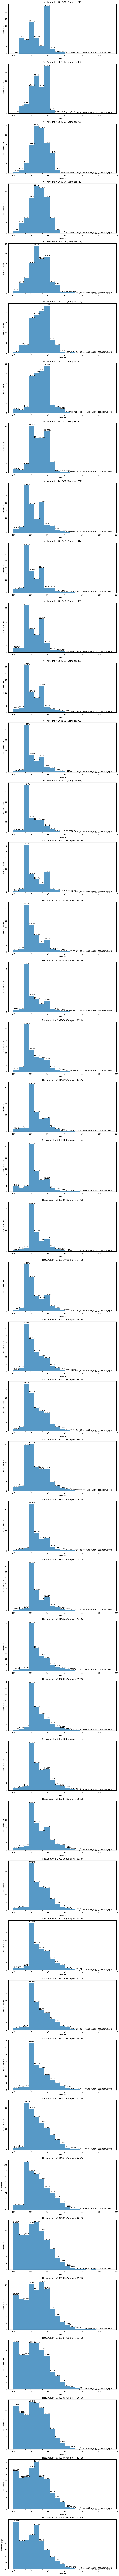

In [18]:
plot_histogram(df, "YearMonth", deposits_only=False)


In [27]:
plot_histogram(df, "YearQuarter", deposits_only=True ,  save_individual_plots=True, save_path="/Users/omrilapidot/Documents/Vebets_fig")


In [28]:
plot_histogram(df, "YearQuarter", deposits_only=False,save_individual_plots=True, save_path="/Users/omrilapidot/Documents/Vebets_fig")


/var/folders/xy/dqjmbwj5485cqh5qfjc3js0h0000gn/T/ipykernel_22878/1413800965.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeGroup'] = time_grouping(df, time_scale)
/var/folders/xy/dqjmbwj5485cqh5qfjc3js0h0000gn/T/ipykernel_22878/1413800965.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = df['DepositAmountInEUR']


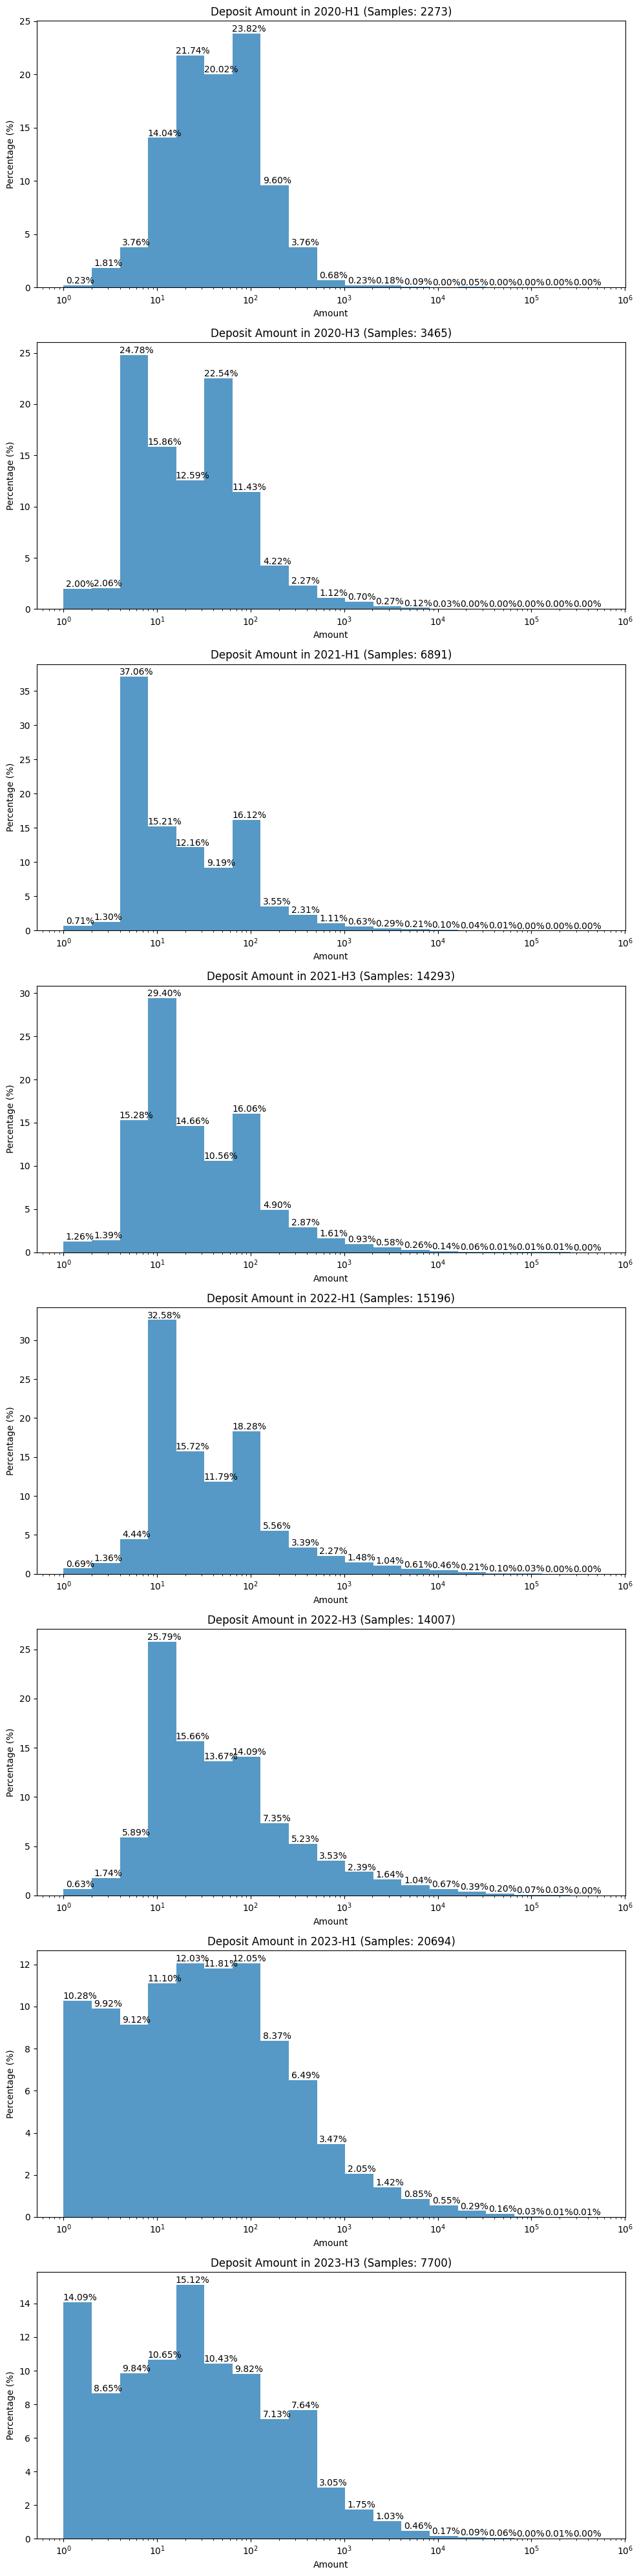

In [21]:
plot_histogram(df, "HalfYear", deposits_only=True)

/var/folders/xy/dqjmbwj5485cqh5qfjc3js0h0000gn/T/ipykernel_22878/1413800965.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeGroup'] = time_grouping(df, time_scale)
/var/folders/xy/dqjmbwj5485cqh5qfjc3js0h0000gn/T/ipykernel_22878/1413800965.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = df['DepositAmountInEUR'] - df['WithdrawalAmountInEUR']


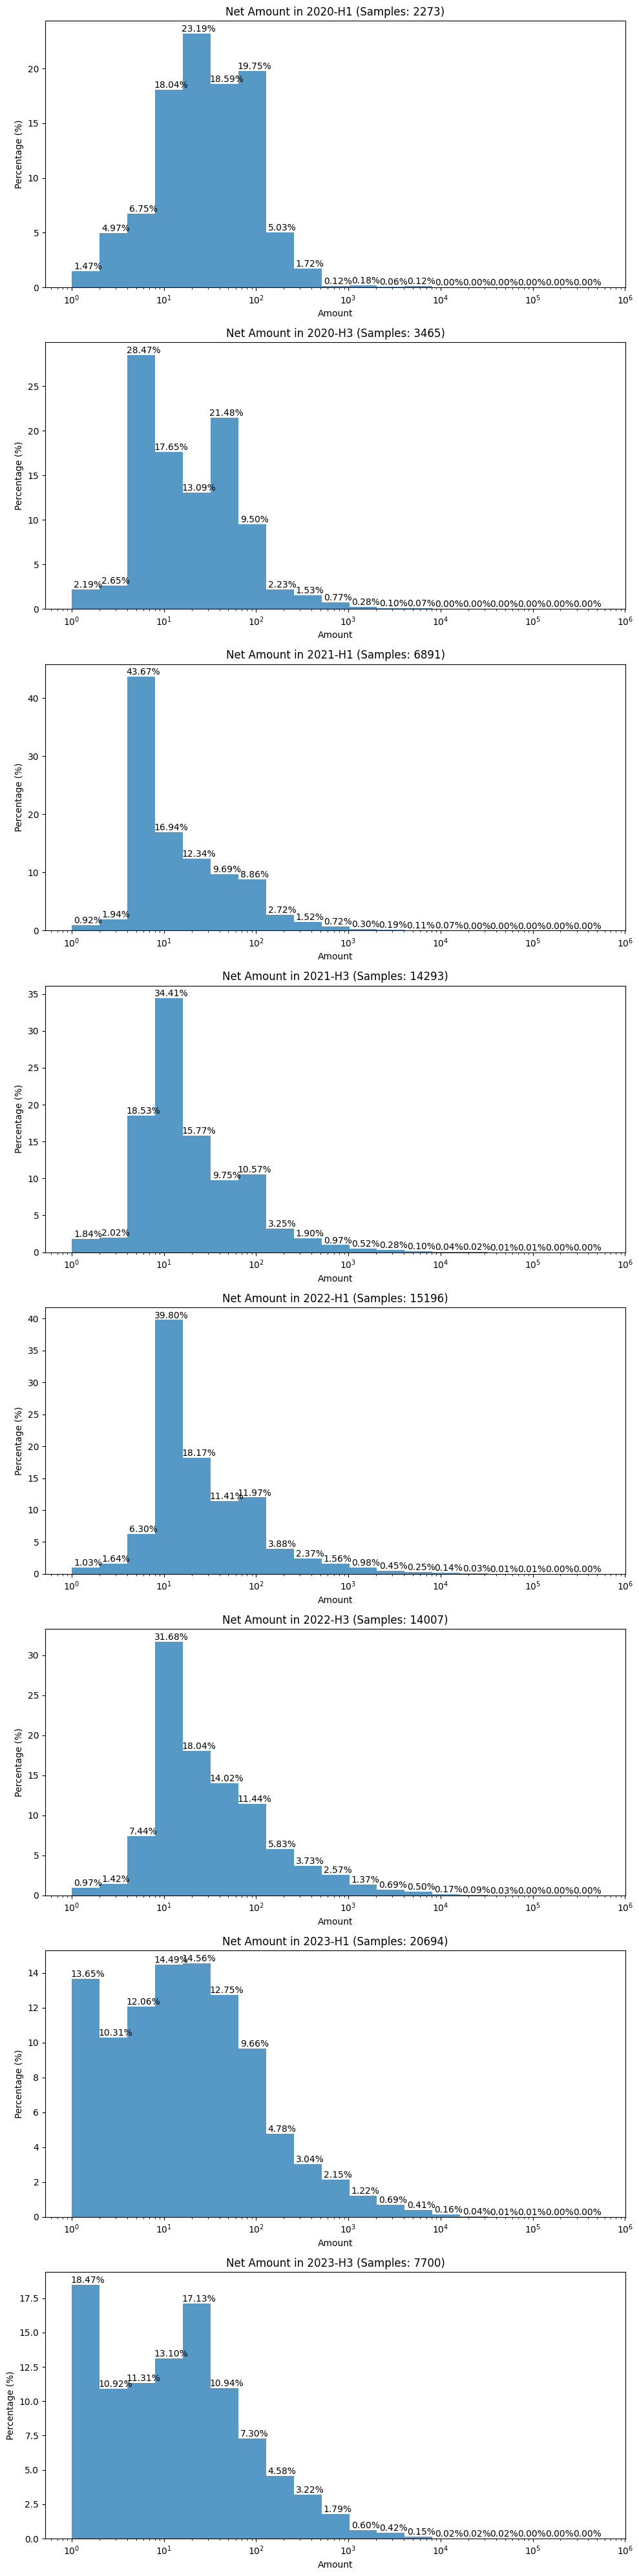

In [22]:
plot_histogram(df, "HalfYear", deposits_only=False)


/var/folders/xy/dqjmbwj5485cqh5qfjc3js0h0000gn/T/ipykernel_22878/1413800965.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeGroup'] = time_grouping(df, time_scale)
/var/folders/xy/dqjmbwj5485cqh5qfjc3js0h0000gn/T/ipykernel_22878/1413800965.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = df['DepositAmountInEUR']


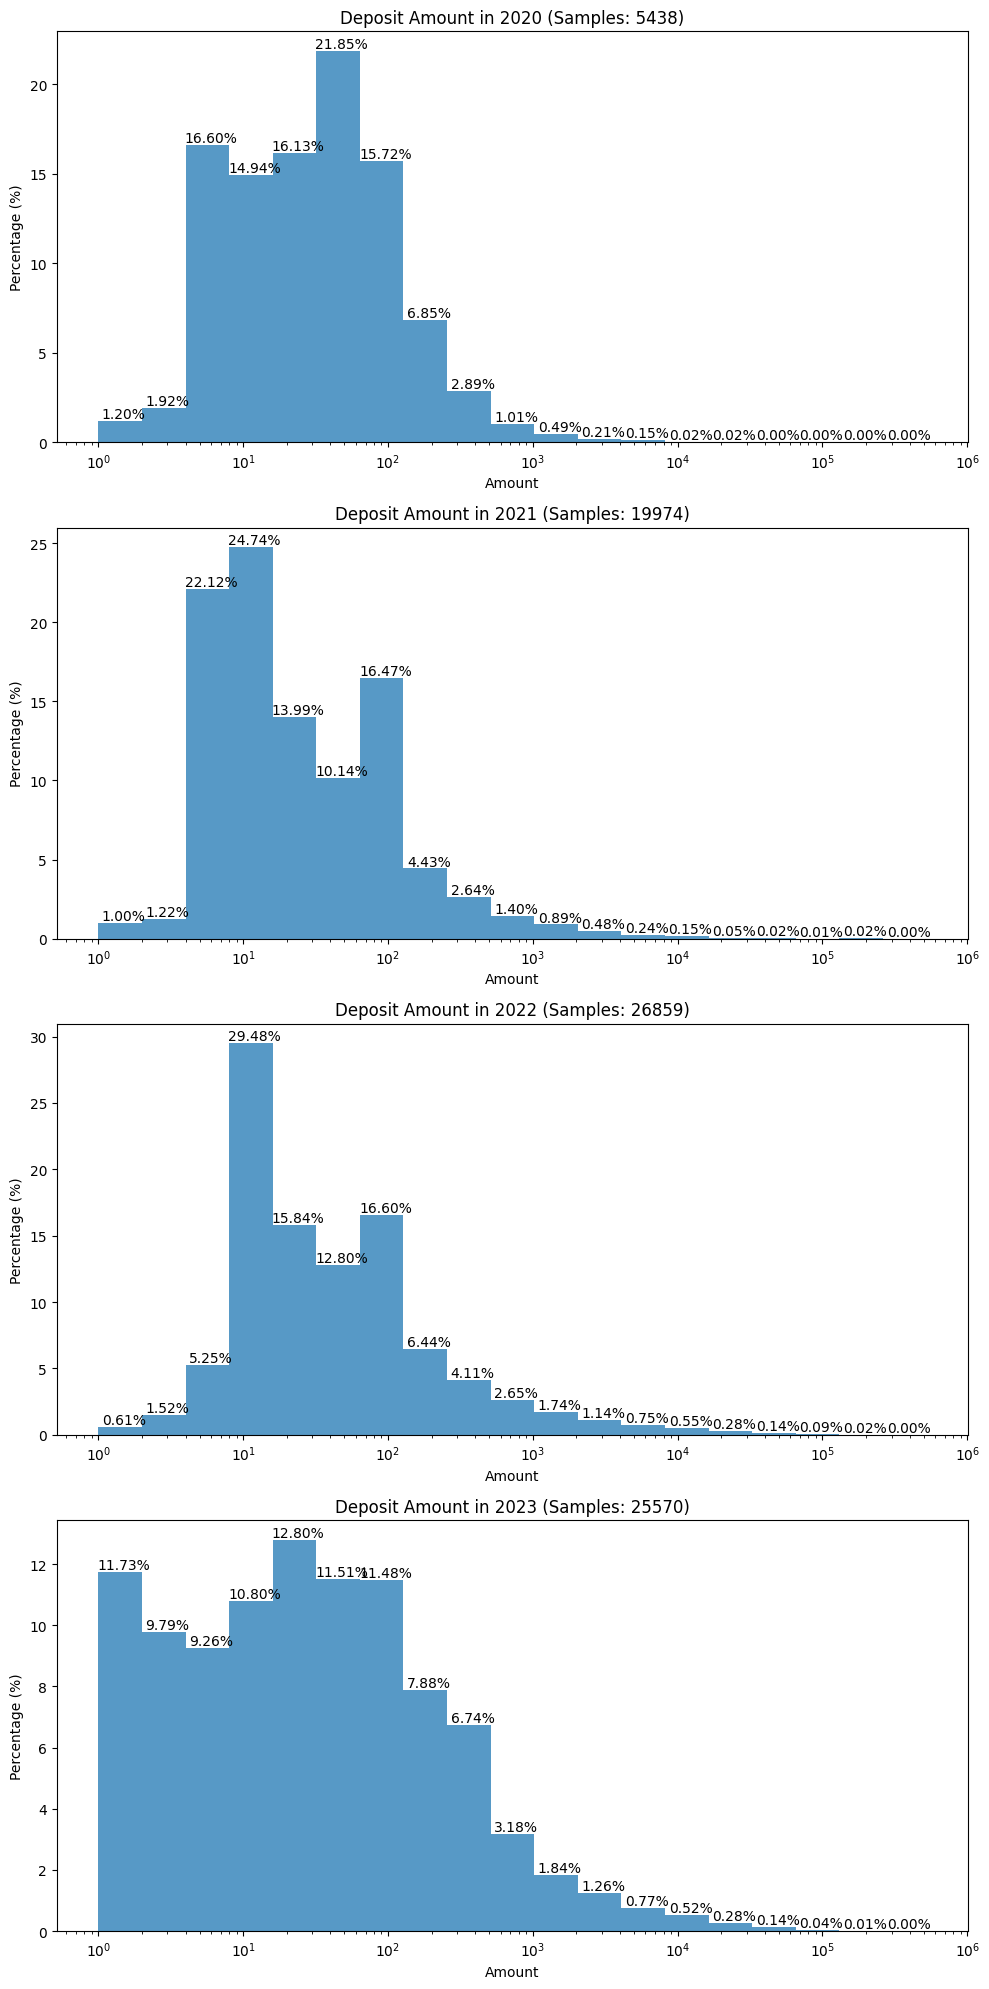

In [23]:
plot_histogram(df, "FullYear", deposits_only=True)


/var/folders/xy/dqjmbwj5485cqh5qfjc3js0h0000gn/T/ipykernel_22878/1413800965.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TimeGroup'] = time_grouping(df, time_scale)
/var/folders/xy/dqjmbwj5485cqh5qfjc3js0h0000gn/T/ipykernel_22878/1413800965.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount'] = df['DepositAmountInEUR'] - df['WithdrawalAmountInEUR']


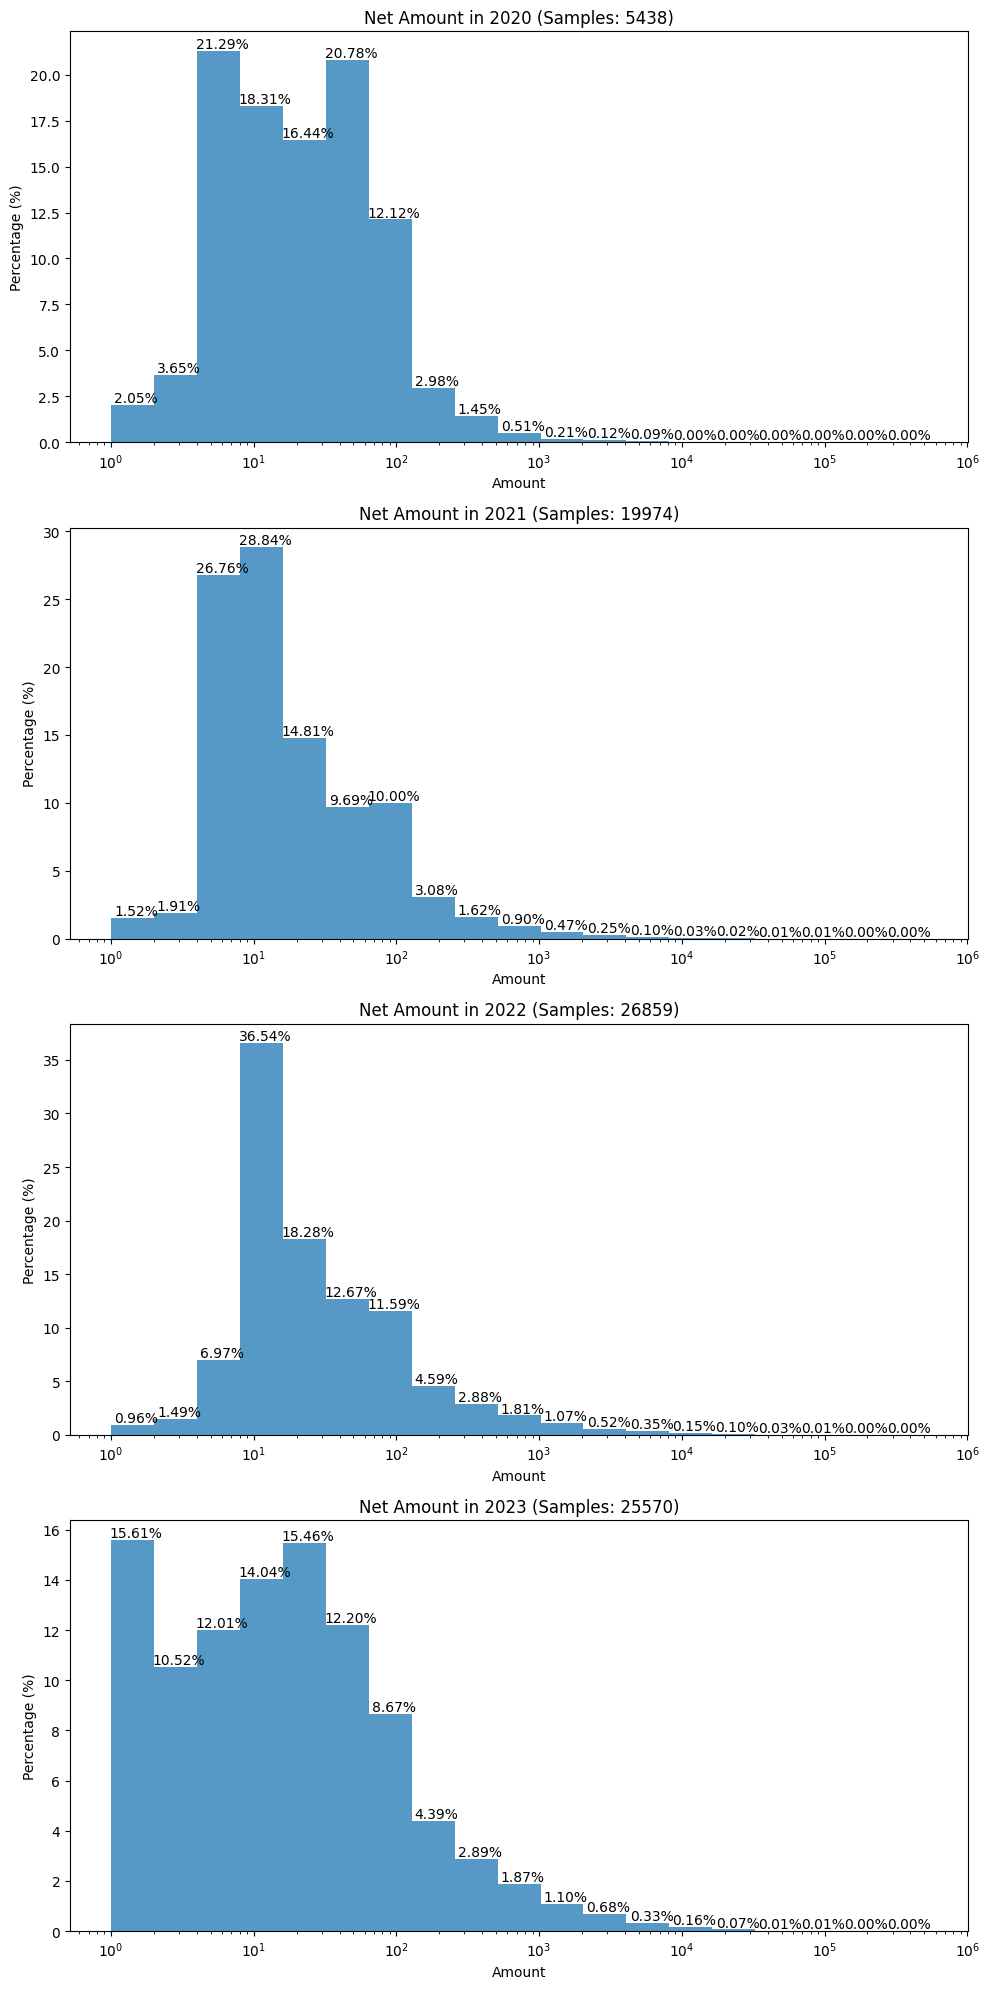

In [24]:
plot_histogram(df, "FullYear", deposits_only=False)

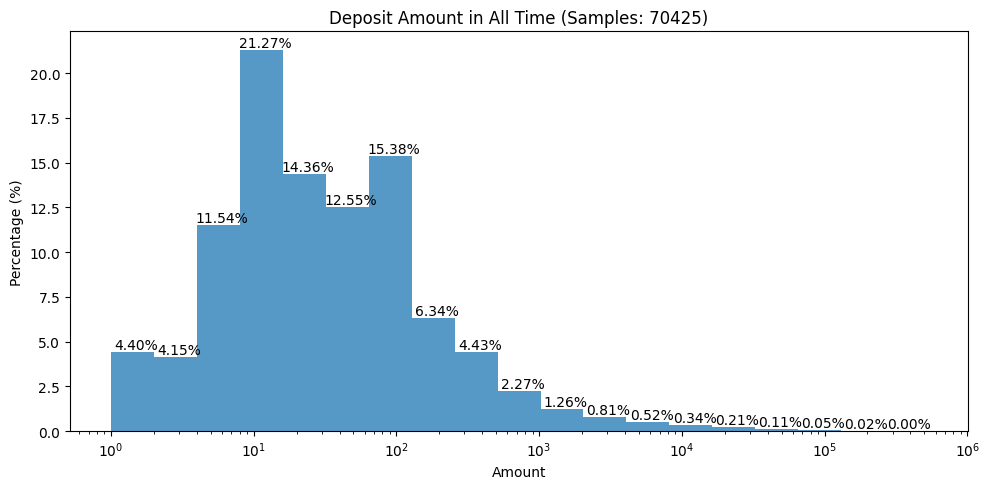

In [31]:
plot_histogram(df, "AllTime")


In [33]:
df.dtypes

TimestampHour                    datetime64[ns, UTC]
PartnerId                                      int64
ClientId                                       int64
CurrencyId                                    object
PaidBonusCount                               float64
PaidBonusAmount                              float64
PaidBonusAmountInEUR                         float64
CashBackBonusCount                           float64
CashBackBonusAmount                          float64
CashBackBonusAmountInEUR                     float64
CorrectionUpCount                            float64
CorrectionUpAmount                           float64
CorrectionUpAmountInEUR                      float64
CorrectionDownCount                          float64
CorrectionDownAmount                         float64
CorrectionDownAmountInEUR                    float64
BuddyToBuddyTransferCount                    float64
BuddyToBuddyTransferAmount                   float64
BuddyToBuddyTransferInEUR                    f

In [45]:
df

,TimestampHour,PartnerId,ClientId,CurrencyId,PaidBonusCount,PaidBonusAmount,PaidBonusAmountInEUR,CashBackBonusCount,CashBackBonusAmount,CashBackBonusAmountInEUR,CorrectionUpCount,CorrectionUpAmount,CorrectionUpAmountInEUR,CorrectionDownCount,CorrectionDownAmount,CorrectionDownAmountInEUR,BuddyToBuddyTransferCount,BuddyToBuddyTransferAmount,BuddyToBuddyTransferInEUR,PointEarned,ExchangeMoney,ExchangeMoneyInEUR,PaymentSystemId,DepositCount,DepositAmount,DepositAmountInEUR,DepositRollbackCount,DepositRollbackAmount,DepositRollbackAmountInEUR,WithdrawalCount,WithdrawalAmount,WithdrawalAmountInEUR,WithdrawalRollbackCount,WithdrawalRollbackAmount,WithdrawalRollbackAmountInEUR,TimeGroup,Amount
0,2022-09-08 08:00:00+00:00,692,325024392,BRL,0.0,0.00,0.00000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All Time,NaN
1,2022-09-08 08:00:00+00:00,692,403277511,BRL,0.0,0.00,0.00000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All Time,NaN
2,2022-09-08 08:00:00+00:00,692,412425811,BRL,0.0,0.00,0.00000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All Time,NaN
3,2022-09-08 08:00:00+00:00,692,685737277,BRL,0.0,0.00,0.00000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All Time,NaN
4,2022-09-08 17:00:00+00:00,692,781492278,BRL,1.0,161.25,30.89422,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All Time,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,2022-08-24 14:00:00+00:00,692,232563960,BRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1399.0,1.0,350.0,66.172939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,All Time,66.172939
819,2022-08-24 22:00:00+00:00,692,652591765,BRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1399.0,1.0,350.0,66.172939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,All Time,66.172939
820,2022-08-24 17:00:00+00:00,692,577021996,BRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.0,1.0,350.0,66.172939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,All Time,66.172939
821,2022-08-24 23:00:00+00:00,692,555194674,BRL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1399.0,1.0,350.0,66.172939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,All Time,66.172939


In [5]:
sum_deposit_per_user = df.groupby('ClientId')["DepositAmountInEUR"].agg(TotalDepositAmountInEUR="sum", CountDepositAmountInEUR="count").reset_index()

In [6]:
sum_deposit_per_user

,ClientId,TotalDepositAmountInEUR,CountDepositAmountInEUR
0,177054004,195.686456,7
1,177064942,21.524354,1
2,177065994,10.762177,1
3,177071940,21.524354,1
4,177072299,0.000000,0
...,...,...,...
70420,1597106625,1.916962,1
70421,1597288970,1.916962,1
70422,1597363134,5.750886,1
70423,1597366753,5.750886,2


In [7]:
sum_deposit_per_user["is_high_roller"] = sum_deposit_per_user["TotalDepositAmountInEUR"]>1000

In [8]:
(sum_deposit_per_user["is_high_roller"]>0).sum()/len(sum_deposit_per_user)

0.03274405395811147

In [9]:
sum_deposit_per_user

,ClientId,TotalDepositAmountInEUR,CountDepositAmountInEUR,is_high_roller
0,177054004,195.686456,7,False
1,177064942,21.524354,1,False
2,177065994,10.762177,1,False
3,177071940,21.524354,1,False
4,177072299,0.000000,0,False
...,...,...,...,...
70420,1597106625,1.916962,1,False
70421,1597288970,1.916962,1,False
70422,1597363134,5.750886,1,False
70423,1597366753,5.750886,2,False


In [10]:
with open(f'/Users/omrilapidot/Vbet_adjusted_data/deposit_per_user.pkl', 'wb') as f:
    pickle.dump(sum_deposit_per_user, f)

In [ ]:


# Assuming your CatBoost model is already trained and you've split the data as X_test and y_test

# Predictions
y_pred = model.predict(test_pool)

# Model Performance Metrics
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1-Score: ", f1_score(y_test, y_pred, average='weighted'))

# Confusion Matrix
plt.figure(figsize=(10,7))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=True)
plt.title("Confusion Matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Feature Importance
plt.figure(figsize=(12,8))
importances = model.get_feature_importance()
sns.barplot(x=importances, y=X_train.columns, palette="viridis")
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 810395 entries, 0 to 822
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype              
---  ------                 --------------   -----              
 0   TimestampHour          810395 non-null  datetime64[ns, UTC]
 1   ClientId               810395 non-null  int64              
 2   DepositAmountInEUR     753521 non-null  float64            
 3   WithdrawalAmountInEUR  753521 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(1)
memory usage: 30.9 MB


In [14]:
import pandas as pd

def calculate_deposit(df, dates, time_deltas):
    """
    For each date in the list of dates, calculate the total DepositAmountInEUR 
    per user from the given date to the date + time delta. Do this for each time delta.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data.
    - dates (list): A list of dates for which the deposit total should be calculated.
    - time_deltas (list): A list of time deltas for the calculation.

    Returns:
    - list: A list of DataFrames. Each DataFrame corresponds to one date and contains ClientId and the total deposits for each time delta.
    """
    
    results = []

    for date in dates:
        # Initialize a DataFrame with ClientIds (this ensures we capture all clients even if they don't have data for all time deltas)
        df_result = df[['ClientId']].drop_duplicates()
        
        for td in time_deltas:
            # Filter the DataFrame for records between the date and date + time delta
            mask = (df['TimestampHour'] >= date) & (df['TimestampHour'] < (date + td))
            filtered_data = df[mask]

            # Group by ClientId and sum the DepositAmountInEUR
            grouped = filtered_data.groupby('ClientId')['DepositAmountInEUR'].sum().reset_index()
            grouped = grouped.rename(columns={'DepositAmountInEUR': f'Total_DepositAmountInEUR_in_period_{td.days}'})

            # Merge the result into the df_result DataFrame
            df_result = pd.merge(df_result, grouped, on='ClientId', how='left').fillna(0)

        results.append(df_result)

    return results

# Example:
dates = [pd.Timestamp('2021-01-01', tz='UTC'), pd.Timestamp('2021-02-01', tz='UTC')]
time_deltas = [pd.Timedelta(days=7), pd.Timedelta(days=14)]

dfs = calculate_deposit(df, dates, time_deltas)


In [12]:
dates = [pd.Timestamp('2021-01-01', tz='UTC'), pd.Timestamp('2021-02-01', tz='UTC')]

time_deltas = [pd.Timedelta(days=7), pd.Timedelta(days=14)]

results = calculate_deposit(df, dates, time_deltas)

In [13]:
results

{(Timestamp('2021-01-01 00:00:00+0000', tz='UTC'),
  Timedelta('7 days 00:00:00')):       ClientId  DepositAmountInEUR
 0    177628861            0.000000
 1    178867450          168.200000
 2    178987851          166.700000
 3    178998673          150.800000
 4    179107906            4.718984
 ..         ...                 ...
 243  314528092           22.021927
 244  314598262            7.864974
 245  314602617            8.355615
 246  314658966            7.864974
 247  314782319            7.864974
 
 [248 rows x 2 columns],
 (Timestamp('2021-01-01 00:00:00+0000', tz='UTC'),
  Timedelta('14 days 00:00:00')):       ClientId  DepositAmountInEUR
 0    177628861            0.000000
 1    178867450          168.200000
 2    178987851          166.700000
 3    178998673          150.800000
 4    179107906            7.787787
 ..         ...                 ...
 434  318155546            8.145976
 435  318178187           30.688026
 436  318284741           41.428835
 437  31830621

In [16]:
dfs[1]

,ClientId,Total_DepositAmountInEUR_in_period_7,Total_DepositAmountInEUR_in_period_14
0,325024392,0.0,10.64396
1,403277511,0.0,0.00000
2,412425811,0.0,0.00000
3,685737277,0.0,0.00000
4,781492278,0.0,0.00000
...,...,...,...
70420,805455302,0.0,0.00000
70421,806396932,0.0,0.00000
70422,806466666,0.0,0.00000
70423,806039792,0.0,0.00000


In [17]:
import pandas as pd

def calculate_deposit(df, dates, time_deltas):
    """
    For each date in the list of dates, calculate the total DepositAmountInEUR 
    per user from the given date to the date + time delta. Do this for each time delta.

    Parameters:
    - df (pandas.DataFrame): The DataFrame containing the data.
    - dates (list): A list of dates for which the deposit total should be calculated.
    - time_deltas (list): A list of time deltas for the calculation.

    Returns:
    - list: A list of DataFrames. Each DataFrame corresponds to one date and contains ClientId and the total deposits for each time delta.
    """
    
    results = []

    for date in dates:
        # Initialize a DataFrame with ClientIds (this ensures we capture all clients even if they don't have data for all time deltas)
        df_result = df[['ClientId']].drop_duplicates()
        
        for td in time_deltas:
            # Filter the DataFrame for records between the date and date + time delta
            mask = (df['TimestampHour'] >= date) & (df['TimestampHour'] < (date + td))
            filtered_data = df[mask]

            # Group by ClientId and sum the DepositAmountInEUR
            grouped = filtered_data.groupby('ClientId')['DepositAmountInEUR'].sum().reset_index()

            # Define the column name based on the start and end date of the period
            col_name = f'Total_DepositAmountInEUR_{date.date()}_{(date + td).date()}'
            grouped = grouped.rename(columns={'DepositAmountInEUR': col_name})

            # Merge the result into the df_result DataFrame
            df_result = pd.merge(df_result, grouped, on='ClientId', how='left').fillna(0)

        results.append(df_result)

    return results

# Example:
dates = [pd.Timestamp('2021-01-01', tz='UTC'), pd.Timestamp('2021-02-01', tz='UTC')]
time_deltas = [pd.Timedelta(days=7), pd.Timedelta(days=14)]

dfs = calculate_deposit(df, dates, time_deltas)


In [20]:
dfs[1]

,ClientId,Total_DepositAmountInEUR_2021-02-01_2021-02-08,Total_DepositAmountInEUR_2021-02-01_2021-02-15
0,325024392,0.0,10.64396
1,403277511,0.0,0.00000
2,412425811,0.0,0.00000
3,685737277,0.0,0.00000
4,781492278,0.0,0.00000
...,...,...,...
70420,805455302,0.0,0.00000
70421,806396932,0.0,0.00000
70422,806466666,0.0,0.00000
70423,806039792,0.0,0.00000
